# Assignment #5 - Deep Learning (Extra Credits)

### <font color="red"> DUE: Dec 6 (Friday) 11:00 pm </font>  

<font color="blue">Vaidehi Sonar</font>

# I. Overview

The aim of the assignment is to understand and implement the deep learning concepts and various deep neural network structures. In this assignment, deep learning can be implemented by either using Tensorflow or Keras. I have used Tensorflow. I have implemented3 different structures in this assignment.

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# II. Data

It is a dataset of a third-party travel insurance servicing company that is based in Singapore. The dataset has been taken from kaggle. Following are the arrtributes:<br/>
**Target**: Claim Status (Claim.Status)<br/>
Name of agency(Agency)<br/>
Type of travel insurance agencies (Agency.Type)<br/>
Distribution channel of travel insurance agencies (Distribution.Channel)<br/>
Name of the travel insurance products (Product.Name)<br/>
Duration of travel (Duration)<br/>
Destination of travel (Destination)<br/>
Amount of sales of travel insurance policies (Net.Sales)<br/>
Commission received for travel insurance agency (Commission)<br/>
Gender of insured (Gender)<br/>
Age of insured (Age)<br/>

### PRE-PROCESSING

Data Pre-processing required. Categorical values are changed to numerical values using label_encoder() and get dummies() from pandas. Gender column has been dropped due to large number of null values(71% of null values).

In [0]:
import timeit
start_time = timeit.default_timer()


In [6]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from sklearn.utils import shuffle
import pandas as pd
import seaborn as sns
from sklearn import model_selection
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import IPython.display as ipd  

In [0]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


In [8]:
le = preprocessing.LabelEncoder()
cls_df = pd.read_csv('/content/gdrive/My Drive/travel insurance.csv')
cls_df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


In [9]:
cls = cls_df.apply(le.fit_transform)
cls.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,3,1,0,12,0,188,79,105,396,80
1,3,1,0,12,0,188,79,105,396,70
2,6,1,1,16,0,67,4,80,716,31
3,6,1,1,16,0,62,4,91,646,31
4,6,1,1,16,0,81,61,120,442,40


In [10]:
corr_mat=cls.corr()
corr_mat

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
Agency,1.000000,0.207529,-0.191928,0.138890,-0.121685,-0.132776,-0.208348,-0.203385,-0.229593,0.136656
Agency Type,0.207529,1.000000,-0.076895,-0.272308,-0.098706,-0.124697,-0.150909,-0.090091,-0.422238,-0.209233
Distribution Channel,-0.191928,-0.076895,1.000000,-0.155318,-0.000798,-0.058109,-0.052289,-0.014495,-0.054692,-0.164432
Product Name,0.138890,-0.272308,-0.155318,1.000000,0.000679,-0.088026,-0.069257,-0.097530,0.521728,0.249311
Claim,-0.121685,-0.098706,-0.000798,0.000679,1.000000,0.099759,0.047105,0.107731,0.100080,-0.012387
Duration,-0.132776,-0.124697,-0.058109,-0.088026,0.099759,1.000000,0.088793,0.381276,0.307109,0.004256
Destination,-0.208348,-0.150909,-0.052289,-0.069257,0.047105,0.088793,1.000000,0.006268,-0.031414,-0.028951
Net Sales,-0.203385,-0.090091,-0.014495,-0.097530,0.107731,0.381276,0.006268,1.000000,0.359348,0.035174
Commision (in value),-0.229593,-0.422238,-0.054692,0.521728,0.100080,0.307109,-0.031414,0.359348,1.000000,0.204648
Age,0.136656,-0.209233,-0.164432,0.249311,-0.012387,0.004256,-0.028951,0.035174,0.204648,1.000000


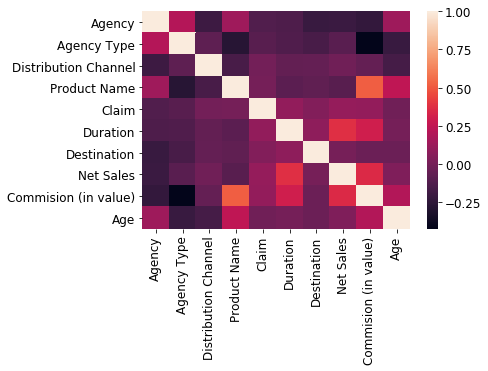

In [11]:
heat_map=sns.heatmap(corr_mat)

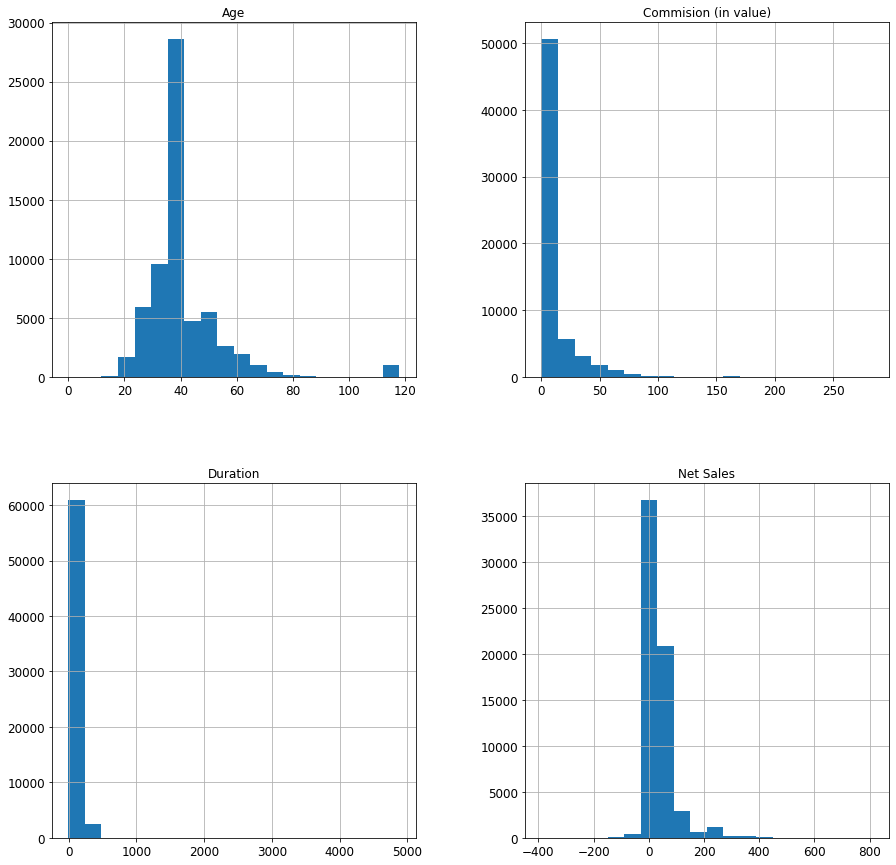

In [12]:
cls_df.hist(bins=20,figsize=(15,15)) 
plt.show()


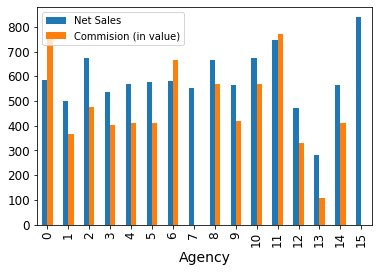

In [13]:
cls_df1=cls.groupby(['Agency']).mean()
bar_plot = cls_df1.plot.bar(y=['Net Sales','Commision (in value)'])

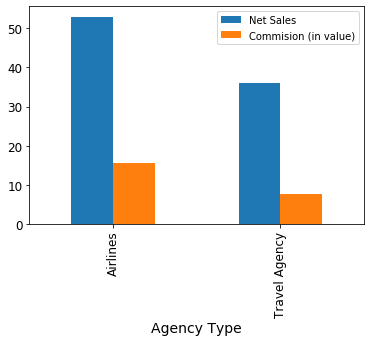

In [14]:
cls_df2=cls_df.groupby(['Agency Type']).mean()
bar_plot = cls_df2.plot.bar(y=['Net Sales','Commision (in value)'])

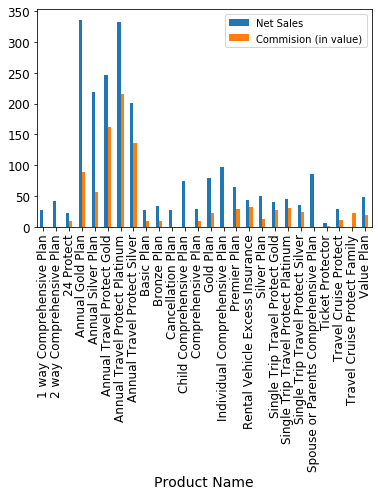

In [15]:
cls_df3=cls_df.groupby(['Product Name']).mean()
bar_plot1 = cls_df3.plot.bar(y=['Net Sales','Commision (in value)'])

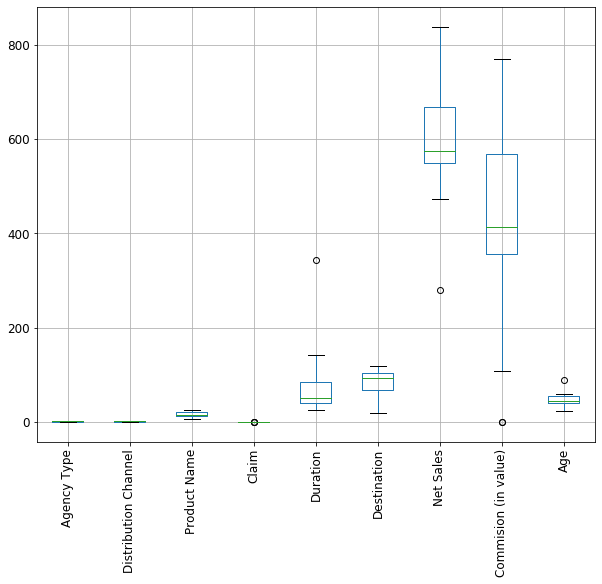

In [16]:
cls_df1.boxplot(rot=90,figsize=(10,8))

### PRELIMINARY OBSERVATIONS

#### Heat Maps and Correlation Matrix:

- There is quite some relevance in product name and commission.
- There is some correlation between duration,age and commission.
- There is some correlation between duration,age and Net Sales.
- Net sales and commission is correlated to some extent.
- Net sales,commission is related to Claim status minorly.
- It can be observed that some attributes such as duration, destination, etc. does not have any impact on claim status.

#### Histograms:

- Data samples mostly belong to the class of people who did not claim the insurance.

#### Bar Plots:

- Net sales as well as commission is higher for airline insurance agencies than travel insurance agencies.
- Agency number 7,15 have no commission.
- Net sales are highest for agency 15 where commission is highest for agency 0(which actually exceeds its net sales).
- The net sales and commission for some products namely Annual Gold Plan and Annual Travel Protect Platinum are significantly high compared to others.

#### Box Plots:

- The quartile range for commission is approx 300-700 and for net sales is approx 500-900.

# III. Methods

In this assignment, you are building a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow (or Keras) codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

<img src="https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67" width=700 />



In [0]:
cls.head()
cls.shape
cls_new1 = cls[cls.Claim == 1]
cls_new2 = cls[cls.Claim == 0]
cls_new2 = cls_new2.sample(n=4000,random_state=100)
cls_new = pd.concat([cls_new1,cls_new2]) 
cls_new = shuffle(cls_new)

In [0]:
t_df = cls_new[['Claim']]
df_cls = cls_new.drop(['Claim'],axis=1)

In [19]:
X_Train, X_Test, T_Train, T_Test = model_selection.train_test_split(df_cls,t_df,test_size=0.20,random_state=17)
X_Train.shape


(3941, 9)

In [0]:
reset_graph()

# 2 inputs and 1 output
ni = 9
nh = 20
no = 1
learning_rate = 0.1

# inputs for training
X = tf.placeholder(tf.float32, [None, ni])
T = tf.placeholder(tf.float32, [None, no])

V = tf.Variable(tf.truncated_normal([ni+1, nh]))
W = tf.Variable(tf.truncated_normal([nh+1, no]))

In [0]:
# forward pass
#  Y =  h(XV) W

a = tf.matmul(X, V[1:, :]) + V[0, :]
Z = tf.tanh(a)  # activation
Y = tf.matmul(Z, W[1:, :]) + W[0, :]

In [0]:
# backward pass
error = T - Y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

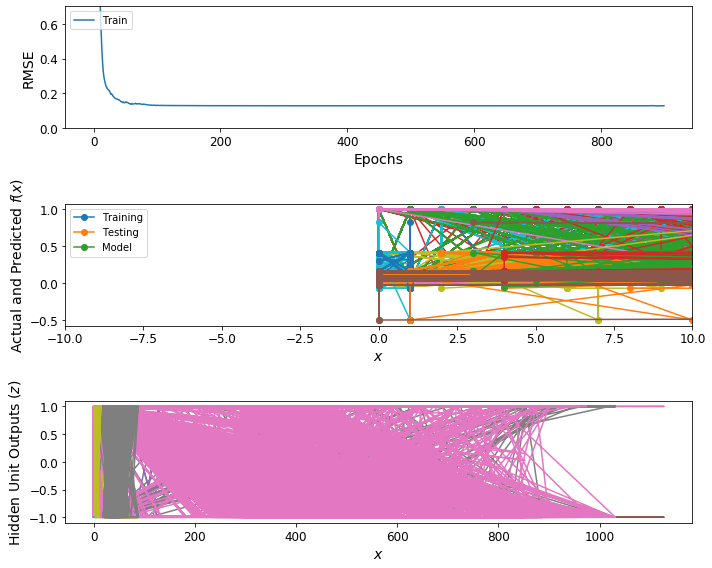

In [23]:
n_epochs = 1000

fig = plt.figure(figsize=(10,8))
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    
    errorTrace = []
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval({X: X_Train, T: T_Train}))

            plt.clf()
            plt.subplot(3,1,1)
            plt.plot(errorTrace[:epoch])
            plt.ylim(0,0.7)
            plt.xlabel('Epochs')
            plt.ylabel('RMSE')
            plt.legend(('Train','Test'),loc='upper left')

            plt.subplot(3,1,2)
            plt.plot(X_Train,T_Train,'o-',X_Test,T_Test,'o-',X_Test,Y.eval({X: X_Test}),'o-')
            plt.xlim(-10,10)
            plt.legend(('Training','Testing','Model'),loc='upper left')
            plt.xlabel('$x$')
            plt.ylabel('Actual and Predicted $f(x)$')

            plt.subplot(3,1,3)
            plt.plot(X_Train, Z.eval({X: X_Train}))
            plt.ylim(-1.1,1.1)
            plt.xlabel('$x$')
            plt.ylabel('Hidden Unit Outputs ($z$)');
            
            plt.tight_layout()

            ipd.clear_output(wait=True)
            ipd.display(fig)            
            
        err, _ = sess.run([mse, training_op], {X: X_Train, T: T_Train})
        errorTrace.append(err)
    

    print("Train MSE: ", mse.eval({X: X_Train, T: T_Train}))
    print("Test MSE: ", mse.eval({X: X_Test, T: T_Test}))
ipd.clear_output(wait=True)

### Choice of network structure

Model 1:<br>
In this implementation I have added 3 hidden layers. This is a simple deep neural network structure. In each hidden layer there are 20 neurons. The input layer is of 9 neurons as there are 9 features in my dataset. There is one neuron in the output layer. I have used different activation functions for each layer like tanh,softmax and sigmoid. The reason for selecting this model is I wanted to the model to be simple by keeping the number of layers to minimum and try different activation functions on different layers.

Model 2:<br>
In this implementation I have added 8 hidden layers. This is a bit complex deep neural network structure. There are 16 neurons in the first hidden layer. With every new hidden layer I am decreasing 2 neurons till I reach a layer with 10 neurons.Then I again increase it till I reach 16 neurons in the last hidden layer. The input layer is of 9 neurons as there are 9 features in my dataset. This structure is similar to Deep Convolution Inverse Graphics Network structure. There is one neuron in the output layer. I have used tanh as the activation function for this model. I selected this model because I wanted to test a complex structure but still I did not want it to overfit.

Model 3:<br>
In this implementation I have added 5 hidden layers. In this structure, there are alternately 9 neurons and 5 neurons in each hidden layer. The input layer is of 9 neurons as there are 9 features in my dataset. There is one neuron in the output layer. I have used elu as my activation function.I chose this model because I wanted to see what happens when we more neurons and less neurons alternately in each hidden layer.





### Explanation of codes

First, I have defined the number of neurons in input layers, hidden layers and output layers and also the learning rate. Then I have passed my data as input for training. Then, I have built my neural network structure and added hidden layers using tf.layers.dense().Then I train my model using Adam Optimiser and calculate the MSE.Then I run the session to train my model in 1000 epochs. Then, I calculate my train and test accuracy and plot the graphs.

### MODEL 1

In [24]:
reset_graph()
ni = 9
nh1 = 20
nh2 = 20
nh3 = 20
no = 1
learning_rate = 0.1

# inputs for training
X = tf.placeholder(tf.float32, [None, ni])
T = tf.placeholder(tf.float32, [None, no])

# neural network building 
with tf.name_scope("nn"):
    Z = tf.layers.dense(X, nh1, activation=tf.sigmoid, name="h1")
    a = tf.layers.dense(Z, nh2, activation=tf.nn.softmax, name="h2")
    b = tf.layers.dense(a, nh3, activation=tf.nn.tanh, name="h3")
    Y = tf.layers.dense(b, no, name="out")

with tf.name_scope("loss"):
    error = T - Y
    mse = tf.reduce_mean(tf.square(error), name="mse")
    
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(mse)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


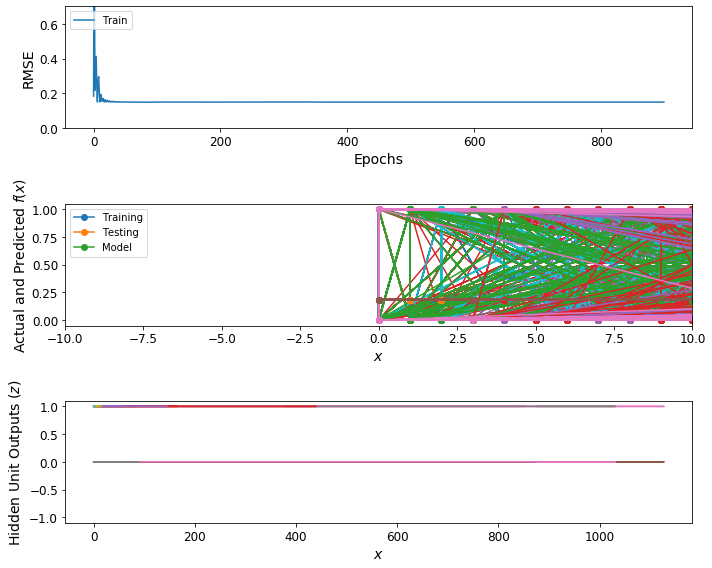

In [25]:
n_epochs = 1000

fig = plt.figure(figsize=(10,8))
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    
    errorTrace = []
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval({X: X_Train, T: T_Train}))

            plt.clf()
            plt.subplot(3,1,1)
            plt.plot(errorTrace[:epoch])
            plt.ylim(0,0.7)
            plt.xlabel('Epochs')
            plt.ylabel('RMSE')
            plt.legend(('Train','Test'),loc='upper left')

            plt.subplot(3,1,2)
            plt.plot(X_Train,T_Train,'o-',X_Test,T_Test,'o-',X_Test,Y.eval({X: X_Test}),'o-')
            plt.xlim(-10,10)
            plt.legend(('Training','Testing','Model'),loc='upper left')
            plt.xlabel('$x$')
            plt.ylabel('Actual and Predicted $f(x)$')

            plt.subplot(3,1,3)
            plt.plot(X_Train, Z.eval({X: X_Train}))
            plt.ylim(-1.1,1.1)
            plt.xlabel('$x$')
            plt.ylabel('Hidden Unit Outputs ($z$)');
            
            plt.tight_layout()

            ipd.clear_output(wait=True)
            ipd.display(fig)            
            
        err, _ = sess.run([mse, training_op], {X: X_Train, T: T_Train})
        errorTrace.append(err)
    

    print("Train MSE: ", mse.eval({X: X_Train, T: T_Train}))
    print("Test MSE: ", mse.eval({X: X_Test, T: T_Test}))
ipd.clear_output(wait=True)

### MODEL 2

In [0]:
reset_graph()
ni = 9
nh1 = 16
nh2 = 14
nh3 = 12
nh4 = 10
nh5 = 10
nh6 = 12
nh7 = 14
nh8 = 16
no = 1
learning_rate = 0.1

# inputs for training
X = tf.placeholder(tf.float32, [None, ni])
T = tf.placeholder(tf.float32, [None, no])

# neural network building 
with tf.name_scope("nn"):
    Z = tf.layers.dense(X, nh1, activation=tf.tanh, name="h1")
    a = tf.layers.dense(Z, nh2, activation=tf.tanh, name="h2")
    b = tf.layers.dense(a, nh3, activation=tf.tanh, name="h3")
    c = tf.layers.dense(b, nh4, activation=tf.tanh, name="h4")
    d = tf.layers.dense(c, nh5, activation=tf.tanh, name="h5")
    e = tf.layers.dense(d, nh6, activation=tf.tanh, name="h6")
    f = tf.layers.dense(e, nh7, activation=tf.tanh, name="h7")
    g = tf.layers.dense(f, nh8, activation=tf.tanh, name="h8")
    Y = tf.layers.dense(g, no, name="out")

with tf.name_scope("loss"):
    error = T - Y
    mse = tf.reduce_mean(tf.square(error), name="mse")
    
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(mse)

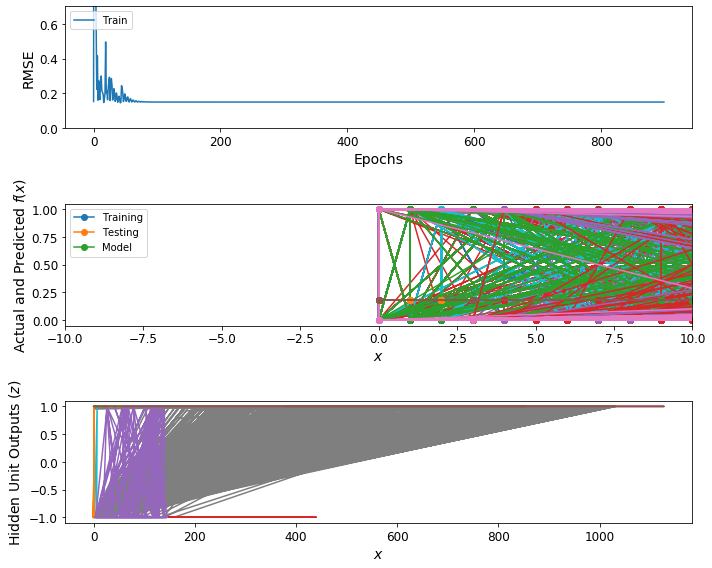

In [27]:
n_epochs = 1000

fig = plt.figure(figsize=(10,8))
init_1 = tf.global_variables_initializer()
with tf.Session() as sess:
    init_1.run()
    
    errorTrace = []
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval({X: X_Train, T: T_Train}))

            plt.clf()
            plt.subplot(3,1,1)
            plt.plot(errorTrace[:epoch])
            plt.ylim(0,0.7)
            plt.xlabel('Epochs')
            plt.ylabel('RMSE')
            plt.legend(('Train','Test'),loc='upper left')

            plt.subplot(3,1,2)
            plt.plot(X_Train,T_Train,'o-',X_Test,T_Test,'o-',X_Test,Y.eval({X: X_Test}),'o-')
            plt.xlim(-10,10)
            plt.legend(('Training','Testing','Model'),loc='upper left')
            plt.xlabel('$x$')
            plt.ylabel('Actual and Predicted $f(x)$')

            plt.subplot(3,1,3)
            plt.plot(X_Train, Z.eval({X: X_Train}))
            plt.ylim(-1.1,1.1)
            plt.xlabel('$x$')
            plt.ylabel('Hidden Unit Outputs ($z$)');
            
            plt.tight_layout()

            ipd.clear_output(wait=True)
            ipd.display(fig)            
            
        err, _ = sess.run([mse, training_op], {X: X_Train, T: T_Train})
        errorTrace.append(err)
    

    print("Train MSE: ", mse.eval({X: X_Train, T: T_Train}))
    print("Test MSE: ", mse.eval({X: X_Test, T: T_Test}))
ipd.clear_output(wait=True)

### MODEL 3

In [0]:
reset_graph()
ni = 9
nh1 = 5
nh2 = 9
nh3 = 5
nh4 = 9
nh5 = 5
no = 1
learning_rate = 0.1

# inputs for training
X = tf.placeholder(tf.float32, [None, ni])
T = tf.placeholder(tf.float32, [None, no])

# neural network building 
with tf.name_scope("nn"):
    Z = tf.layers.dense(X, nh1, activation=tf.nn.elu, name="h1")
    a = tf.layers.dense(Z, nh2, activation=tf.nn.elu, name="h2")
    b = tf.layers.dense(a, nh3, activation=tf.nn.elu, name="h3")
    c = tf.layers.dense(b, nh4, activation=tf.nn.elu, name="h4")
    d = tf.layers.dense(c, nh5, activation=tf.nn.elu, name="h5")
    Y = tf.layers.dense(d, no, name="out")

with tf.name_scope("loss"):
    error = T - Y
    mse = tf.reduce_mean(tf.square(error), name="mse")
    
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(mse)

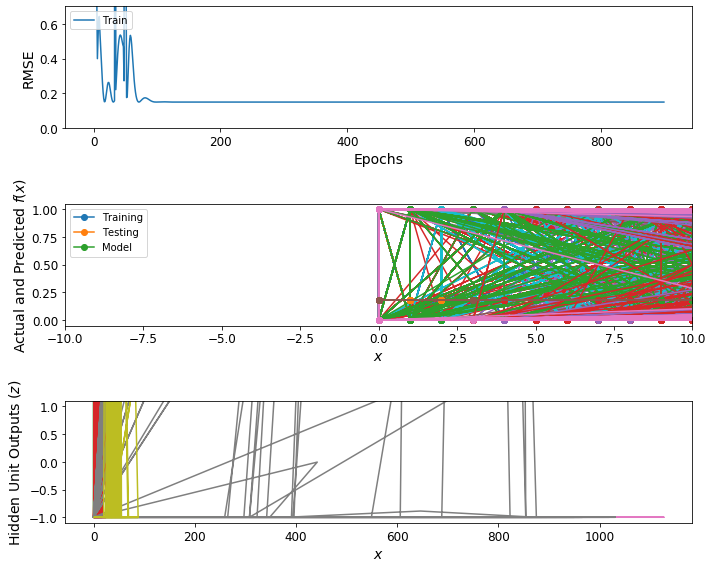

In [29]:
n_epochs = 1000

fig = plt.figure(figsize=(10,8))
init_2 = tf.global_variables_initializer()
with tf.Session() as sess:
    init_2.run()
    
    errorTrace = []
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval({X: X_Train, T: T_Train}))

            plt.clf()
            plt.subplot(3,1,1)
            plt.plot(errorTrace[:epoch])
            plt.ylim(0,0.7)
            plt.xlabel('Epochs')
            plt.ylabel('RMSE')
            plt.legend(('Train','Test'),loc='upper left')

            plt.subplot(3,1,2)
            plt.plot(X_Train,T_Train,'o-',X_Test,T_Test,'o-',X_Test,Y.eval({X: X_Test}),'o-')
            plt.xlim(-10,10)
            plt.legend(('Training','Testing','Model'),loc='upper left')
            plt.xlabel('$x$')
            plt.ylabel('Actual and Predicted $f(x)$')

            plt.subplot(3,1,3)
            plt.plot(X_Train, Z.eval({X: X_Train}))
            plt.ylim(-1.1,1.1)
            plt.xlabel('$x$')
            plt.ylabel('Hidden Unit Outputs ($z$)');
            
            plt.tight_layout()

            ipd.clear_output(wait=True)
            ipd.display(fig)            
            
        err, _ = sess.run([mse, training_op], {X: X_Train, T: T_Train})
        errorTrace.append(err)
    

    print("Train MSE: ", mse.eval({X: X_Train, T: T_Train}))
    print("Test MSE: ", mse.eval({X: X_Test, T: T_Test}))
ipd.clear_output(wait=True)

# IV - Results

- Presents the results of applications of your deep networks.
- Visualize the results 
- Discuss about the choice of network structures and performance of it as you change the structures.  
- What do you think about the results? 

### Visualization of Results
The visualizations of the results are presented below each code of the structures itself.

### Results
Structure 1<br> 
MSE Training: 0.13754156 <br>
MSE Testing: 0.139788

Structure 2<br>
MSE Training: 0.15219513 <br>
MSE Testing: 0.1549604

Structure 3<br>
MSE Training: 0.15219517 <br>
MSE Testing: 0.15496063

From the MSE values we can see that model 1 is better than 2 and 3. There is not a large difference in the MSE values of structure 2 and 3.


### Choice of network structures, performance and reason

I have chosen these structures because I found them interesting and something that I had not used before. In this assignment, I have played around a lot with different structures beginning with the simplest to the complex and have then only finalized these 3 structures.<br> 
I tried out different activation functions as well. I tried applying different activation function on different hidden layers and also with different structures.<br>
I tweaked number of neurons in each and every hidden layers a lot of times. I finally reached a stage where the accuracy was satisfactory. Although, I feel with more time fine tuning of the models can be done to achieve a lot better results.<br>
For my data model 1 performs better than models 2 and 3. 

### What do you think about the results?

I actually thought with more number of layers my accuracy would increase. But it was the opposite. I found out that simpler structure with 2-3 layers suits my data more. So, for my data out of the three models, model 1 works better. If given more time, more appropriate number of neurons, number of hidden layers, activationo functions and structures can be selected and tuned.

# Conclusions


The challenge was installing tensorflow. Tensorflow was not getting installed so I did the assignment on google colab. The assignment helped me in understanding deep neural network. The challenge was to find the correct set of activation functions, number of hidden layers and the number of neurons in each hidden layer. In this assignment, I learned Tensorflow. I would love to explore more about various types of deep neural network structures in the future.  

In [30]:
total_time_required = timeit.default_timer() - start_time
total_time_required

69.66619559

# EXTRA CREDIT

I have first run the file on Google colab by selecting runtime type as none. To run the file on GPU I have set the runtime type as GPU on Google colab.

Time required on normal machine: 98.71327790100077<br>
Time required on GPU: 69.66619559 

## Grading

Only well-written notebook will be graded. Please follow the structure and fill in as the other assignments. 

extra credit points | description
--|:--
1 | First structure (implementation, explanation, plot results, discussion of results)
1 | Second structure (implementation, explanation, plot results, discussion of results)
1 | Third structure (implementation, explanation, plot results, discussion of results)
1 | Explaining and discussing the reason for the selection (Any relation to your data?)
  | Comparing the results, discuss or verify your choice 

#### Optional Extra Credits

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources or MAMBA cluster for this test. 
- [OPT 2] Implement one of neural networks in the chart above and apply it to some real data. 